In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
from utils import *

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE

from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
%load_ext autoreload
%autoreload 2

In [2]:
model_1_data = pd.read_csv('model_1/model_1_data.csv')

In [31]:
model_1_data.columns

Index(['sk_match_id', 'frame', 'minute', 'player_name', 'pass_recipient_name',
       'pass_recipient_id', 'pass_recipient_position', 'sk_player_id',
       'pass_angle', 'type_primary', 'type_secondary', 'location_x',
       'location_y', 'pass_accurate', 'team_name', 'possession_team_name',
       'possession_team_name_src', 'possession_types', 'period',
       'receive_frame', 'receive_x', 'receive_y', 'target_area', 'ball_x_0',
       'ball_y_0', 'ball_x_1', 'ball_y_1', 'player_x_1', 'player_y_1',
       'player_1', 'ball_x_2', 'ball_y_2', 'player_x_2', 'player_y_2',
       'player_2', 'ball_x_3', 'ball_y_3', 'player_x_3', 'player_y_3',
       'player_3', 'sk_recipient_id', 'long_name', 'dist_0', 'dist_1',
       'dist_2', 'dist_3', 'score_1', 'score_2', 'score_3', 'attack_score',
       'defend_score', 'SoF', 'attacker_count', 'defender_count', 'team',
       'paired_player', 'min_distance', 'score_diff', 'success',
       'ball_dist_1'],
      dtype='object')

In [32]:
model_1_data[['sk_match_id', 'sk_recipient_id', 'receive_frame']].head(20)

,sk_match_id,sk_recipient_id,receive_frame
0,1133199,62787,567.0
1,1133199,68737,923.0
4,1133199,64167,2462.0
5,1133199,68683,2626.0
6,1133199,57099,5560.0
7,1133199,68683,7113.0
8,1133199,62787,8882.0
9,1133199,62787,12446.0
10,1133199,57099,13598.0
12,1133199,22364,20875.0


In [3]:
model_1_data['score_diff'] = model_1_data['attack_score'] - model_1_data['defend_score']

In [4]:
model_1_data['success'] = ((model_1_data['score_1'] == 1) | (model_1_data['score_2'] == 1)).astype(int)

In [6]:
model_1_data['ball_dist_1'] =  model_1_data.apply(lambda row: euclidean_distance(row['player_x_1'], row['player_y_1'], row['ball_x_1'], row['ball_y_1']), axis = 1)

In [7]:
model_1_data = model_1_data[model_1_data['ball_dist_1'] < 5]

In [8]:
same = model_1_data[model_1_data['sk_recipient_id'] == model_1_data['player_1']]

In [6]:
len(same)/len(model_1_data)

0.9483600837404047

In [9]:
cols = ['sk_match_id', 'frame', 'player_name', 'pass_recipient_name',  'sk_player_id', 'SoF', 'success', 'receive_frame', 'player_1', 'min_distance']

In [59]:
model_1_data[model_1_data['sk_recipient_id'] != model_1_data['player_1']][cols]

,sk_match_id,frame,player_name,pass_recipient_name,sk_player_id,SoF,success,receive_frame,player_1,min_distance
2,1133199,1788,J. Rytting Kaneryd,J. Rytting Kaneryd,63556.0,5.143659,0,1788.0,NaN,0.772010
11,1133199,19926,M. Mjelde,J. Rytting Kaneryd,22354.0,26.809008,0,19985.0,NaN,0.434166
17,1133199,23411,A. Neville,G. Clinton,68736.0,11.884837,0,23412.0,NaN,2.225062
30,1133199,59927,J. Carter,N. Charles,57093.0,114.927281,0,59939.0,NaN,2.046876
32,1133199,61235,M. Fishel,J. Canković,769835.0,18.812781,0,61241.0,NaN,1.876726
33,1133199,32681,M. Fishel,N. Charles,769835.0,311.580042,0,32689.0,NaN,2.332595
48,1133199,42713,A. Neville,G. Clinton,68736.0,38.033039,0,42720.0,NaN,5.442426
49,1133199,46729,M. Fishel,L. James,769835.0,10.095899,0,46734.0,68736.0,2.515572
72,1133199,58113,M. Leupolz,M. Fishel,22435.0,7.294558,0,58125.0,NaN,1.248079
78,1133200,48539,Y. Hasegawa,A. Greenwood,22684.0,17.707686,1,48539.0,258918.0,5.882329


In [11]:
model_1_data.describe()

,sk_match_id,frame,minute,pass_recipient_id,sk_player_id,pass_angle,location_x,location_y,period,receive_frame,receive_x,receive_y,ball_x_0,ball_y_0,ball_x_1,ball_y_1,player_x_1,player_y_1,player_1,ball_x_2,ball_y_2,player_x_2,player_y_2,player_2,ball_x_3,ball_y_3,player_x_3,player_y_3,player_3,sk_recipient_id,dist_0,dist_1,dist_2,dist_3,score_1,score_2,score_3,attack_score,defend_score,SoF,attacker_count,defender_count,success,ball_dist_1,score_diff
count,5.732000e+03,5732.000000,5732.000000,5732.000000,5728.000000,5732.000000,5732.000000,5732.000000,5732.000000,5732.000000,5732.000000,5732.000000,5732.000000,5732.000000,5732.000000,5732.000000,5732.000000,5732.000000,5732.000000,4530.000000,4530.000000,4445.000000,4445.000000,4537.000000,3408.000000,3408.000000,3358.000000,3358.000000,3423.000000,5732.000000,5732.000000,5732.000000,4445.000000,3358.000000,5732.000000,5732.000000,5732.000000,5732.000000,5732.000000,5732.000000,5732.000000,5732.000000,5732.000000,5732.000000,5732.000000
mean,1.302814e+06,30028.622121,47.259246,303047.540475,76689.374476,5.017620,71.411549,50.224878,1.506106,30041.487788,0.520290,-3.323334,0.516893,-3.386724,0.656397,-3.337701,0.652449,-3.195694,76257.110433,0.880296,-2.335347,1.036252,-2.137615,82152.906105,0.765067,-1.708110,0.741957,-1.552641,77459.453403,74751.901431,36.062149,33.898966,31.570719,34.090795,0.360084,0.440335,0.299023,0.826762,0.604501,80.731939,3.169749,5.763608,0.591417,1.834346,0.222261
std,1.076949e+05,17606.878090,27.520810,198097.199802,120123.307648,85.682689,12.346762,33.613430,0.500006,17606.986346,29.767937,27.157207,29.959846,26.610550,32.523419,25.186537,32.404006,25.927141,112728.317336,32.092419,21.002263,31.875282,21.135092,134073.120370,29.683703,18.984423,29.368149,19.208161,121059.973102,110423.546245,5.567908,7.316485,12.737118,14.302910,0.480066,0.496471,0.457870,1.182742,0.931468,75.173858,1.984139,2.376552,0.491615,0.989510,1.515167
min,1.133199e+06,202.000000,0.000000,1703.000000,22327.000000,-178.000000,6.000000,0.000000,1.000000,210.000000,-49.750000,-35.320000,-51.080000,-35.430000,-53.110000,-37.060000,-53.650000,-36.190000,22327.000000,-54.940000,-37.040000,-55.000000,-34.570000,22327.000000,-54.200000,-35.420000,-52.820000,-35.000000,22327.000000,22327.000000,20.574560,5.642561,0.725328,0.725328,0.000000,0.000000,0.000000,0.000000,0.000000,2.852540,0.000000,0.000000,0.000000,0.028284,-7.000000
25%,1.224542e+06,14728.000000,24.000000,134342.000000,22712.000000,-45.000000,64.000000,16.000000,1.000000,14756.000000,-27.675000,-28.070000,-27.812500,-27.762500,-30.040000,-26.830000,-29.920000,-27.200000,22724.000000,-29.225000,-22.435000,-28.630000,-22.180000,22705.000000,-26.227500,-18.515000,-25.930000,-18.740000,22702.000000,22712.000000,32.185203,29.070666,23.630838,24.493915,0.000000,0.000000,0.000000,0.000000,0.000000,23.093081,2.000000,4.000000,0.000000,1.100238,0.000000
50%,1.303618e+06,29768.000000,46.000000,290005.000000,62411.000000,0.000000,72.000000,51.000000,2.000000,29784.000000,17.540000,-21.765000,16.690000,-21.825000,12.435000,-18.070000,13.475000,-18.985000,62411.000000,1.160000,-4.520000,1.450000,-3.670000,62505.000000,0.855000,-2.415000,1.065000,-1.785000,62574.000000,60442.000000,36.297885,34.212863,32.434799,33.680987,0.000000,0.000000,0.000000,0.000000,0.000000,52.046973,3.000000,6.000000,1.000000,1.664467,0.000000
75%,1.385658e+06,45067.250000,70.000000,476759.000000,68421.000000,53.000000,79.000000,84.000000,2.000000,45072.250000,28.272500,26.010000,28.302500,25.540000,31.040000,24.030000,30.970000,24.882500,68534.000000,30.887500,18.300000,30.710000,18.610000,68421.000000,27.480000,14.995000,27.407500,15.252500,68512.000000,68253.250000,40.313898,39.213138,39.943160,43.266067,1.000000,1.000000,1.000000,1.000000,1.000000,119.040687,5.000000,8.000000,1.000000,2.438222,1.000000
max,1.618208e+06,66411.000000,106.000000,986901.000000,812924.000000,180.000000,99.000000,100.000000,2.000000,66428.000000,49.040000,36.150000,50.540000,3

In [10]:
model_1_data = model_1_data[model_1_data['SoF']<400]

In [11]:
model_1_data.shape

(5730, 60)

In [12]:
model_1_data['team'] = model_1_data['team'].apply(lambda x: 1 if x == 'home' else 0)

In [22]:
sampled_df = (
    model_1_data.groupby('sk_match_id', group_keys=False)
      .apply(lambda group: group.sample(frac=0.6, random_state=42))
)

In [23]:
model_df = model_1_data.loc[model_1_data.index.difference(sampled_df.index)]

In [24]:
features = ["score_diff", "SoF", "attacker_count", "defender_count", "team", 'min_distance']
target = "success"

In [25]:
model_df = model_df[features+[target]]

In [26]:
model_df.isna().sum()

score_diff        0
SoF               0
attacker_count    0
defender_count    0
team              0
min_distance      0
success           0
dtype: int64

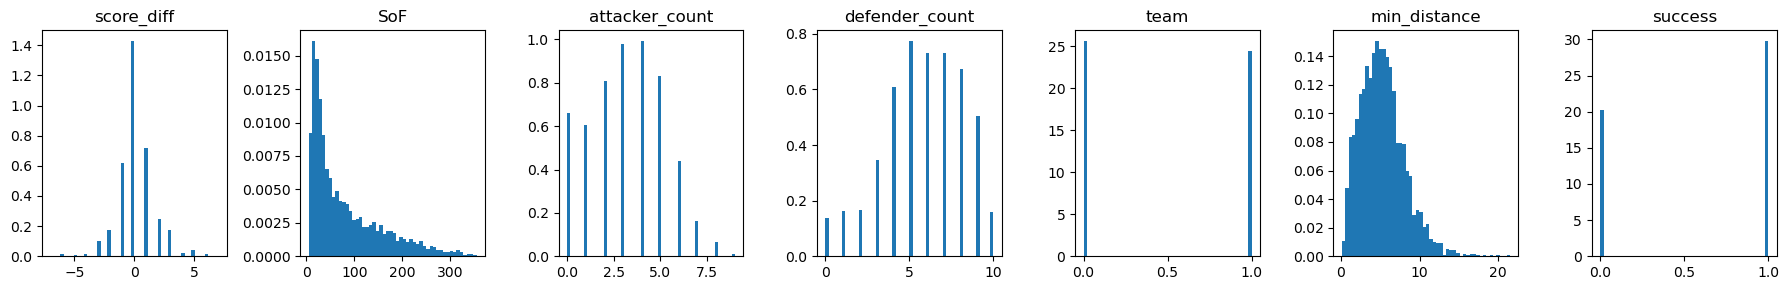

In [19]:
plt.figure(figsize=(18,3))

for i, col in enumerate(features+[target]):
    plt.subplot(1, 7, i+1)
    plt.hist(model_df[col], bins=50, density=True)
    plt.title(col)

plt.tight_layout()
plt.show()

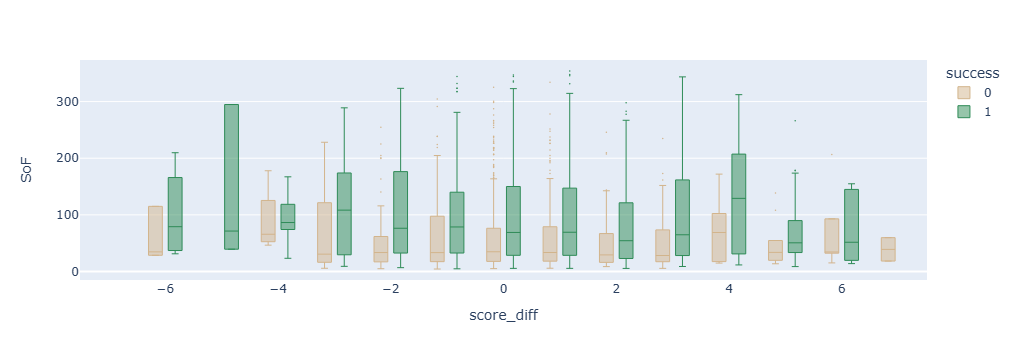

In [34]:
fig = px.box(
    model_df,
    x="score_diff",
    y="SoF",
    color="success",
    color_discrete_map={1: "seagreen", 0: "tan"}  # Map specific colors
)

# Update the quartile method and style
fig.update_traces(
    quartilemethod="exclusive", marker=dict(size=1.5),
    line_width=1  # Remove edge lines
)

# Show the plot
fig.show()

In [75]:
model_df[target].value_counts()

success
1    1712
0    1150
Name: count, dtype: int64

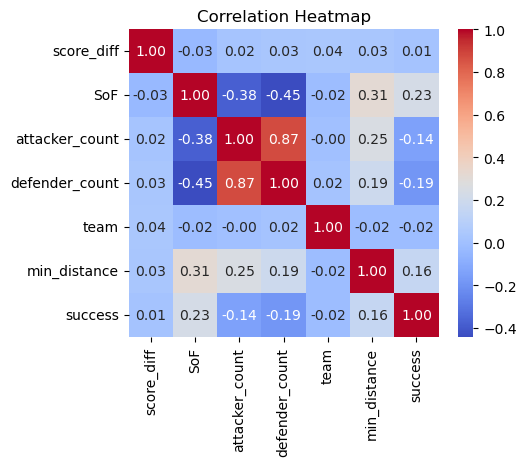

In [77]:
correlation_matrix = model_df[features + [target]].corr()
plt.figure(figsize=(5,4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [27]:
X = model_df[features]
y = model_df[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [28]:
models = {
    "RandomForest": {
        "model": RandomForestClassifier(random_state=42),
        "params": {
            "n_estimators": [50, 100, 150],
            "max_depth": [None, 10, 20],
        },
    },
    "GradientBoosting": {
        "model": GradientBoostingClassifier(random_state=42),
        "params": {
            "n_estimators": [50, 100, 150],
            "learning_rate": [0.01, 0.1, 0.2],
            "max_depth": [3, 5, 7],
        },
    },
    "LogisticRegression": {
        "model": LogisticRegression(random_state=42, max_iter=500),
        "params": {
            "C": [0.1, 1, 10],
            "penalty": ["l2"],
            "solver": ["liblinear", "lbfgs"],
        },
    },
    "KNeighbors": {
        "model": KNeighborsClassifier(),
        "params": {
            "n_neighbors": [3, 5, 7],
            "weights": ["uniform", "distance"],
        },
    },
    "XGBoost": {
        "model": XGBClassifier(random_state=42, use_label_encoder=False, eval_metric="logloss"),
        "params": {
            "n_estimators": [50, 100, 150],
            "learning_rate": [0.01, 0.1, 0.2],
            "max_depth": [3, 5, 7],
        },
    },
}

# Perform GridSearchCV for each model
best_models = {}
for name, entry in models.items():
    print(f"Optimizing {name}...")
    grid = GridSearchCV(entry["model"], entry["params"], cv=5, scoring="accuracy", n_jobs=-1)
    grid.fit(X_train, y_train)
    best_models[name] = grid.best_estimator_
    print(f"Best params for {name}: {grid.best_params_}")
    print(f"Best cross-validated accuracy for {name}: {grid.best_score_:.4f}\n")

# Compare performance on the test set
print("Performance Comparison:")
for name, model in best_models.items():
    y_pred = model.predict(X_test)
    print(f"Model: {name}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Classification Report:\n{classification_report(y_test, y_pred)}")
    print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n")

Optimizing RandomForest...
Best params for RandomForest: {'max_depth': None, 'n_estimators': 100}
Best cross-validated accuracy for RandomForest: 0.6714

Optimizing GradientBoosting...
Best params for GradientBoosting: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 150}
Best cross-validated accuracy for GradientBoosting: 0.6527

Optimizing LogisticRegression...
Best params for LogisticRegression: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
Best cross-validated accuracy for LogisticRegression: 0.6273

Optimizing KNeighbors...
Best params for KNeighbors: {'n_neighbors': 3, 'weights': 'distance'}
Best cross-validated accuracy for KNeighbors: 0.6727

Optimizing XGBoost...
Best params for XGBoost: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 150}
Best cross-validated accuracy for XGBoost: 0.6527

Performance Comparison:
Model: RandomForest
Accuracy: 0.5764
Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.56

Feature Importances for RandomForest:
          Feature  Importance
0             SoF    0.349543
1    min_distance    0.316839
2  defender_count    0.105169
3  attacker_count    0.096071
4      score_diff    0.095586
5            team    0.036791


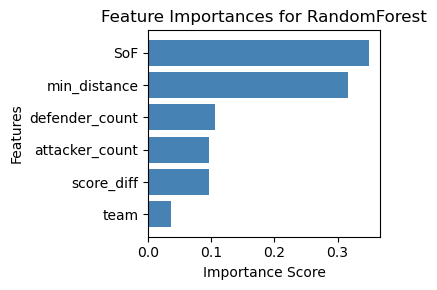

Feature Importances for GradientBoosting:
          Feature  Importance
0             SoF    0.437003
1    min_distance    0.324936
2  defender_count    0.090555
3  attacker_count    0.062516
4      score_diff    0.060840
5            team    0.024150


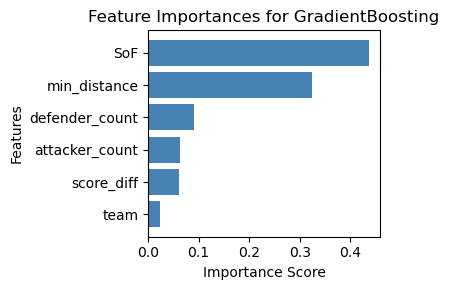

Feature Importances for XGBoost:
          Feature  Importance
0             SoF    0.218403
1  defender_count    0.175837
2    min_distance    0.162932
3  attacker_count    0.152063
4            team    0.152034
5      score_diff    0.138732


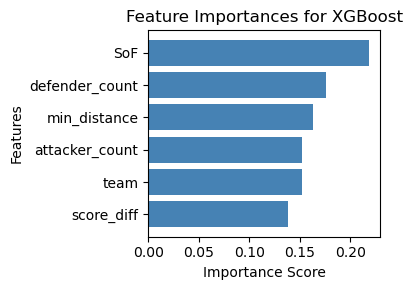

In [85]:
for name, model in best_models.items():
    if hasattr(model, "feature_importances_"):
        print(f"Feature Importances for {name}:")
        
        # Extract feature importance
        feature_importances = model.feature_importances_
        sorted_idx = np.argsort(feature_importances)[::-1]  # Sort in descending order
        
        # Create a DataFrame for better visualization
        importance_df = pd.DataFrame({
            "Feature": X_train.columns[sorted_idx],
            "Importance": feature_importances[sorted_idx],
        })
        
        print(importance_df)
        
        # Plot the feature importance
        plt.figure(figsize=(4, 3))
        plt.barh(
            importance_df["Feature"], 
            importance_df["Importance"], 
            color="steelblue"
        )
        plt.gca().invert_yaxis()  # Reverse the order for better readability
        plt.title(f"Feature Importances for {name}")
        plt.xlabel("Importance Score")
        plt.ylabel("Features")
        plt.tight_layout()
        plt.show()

In [86]:
logistic_model = best_models["LogisticRegression"]

# Prepare the features from sampled_df
X_sampled = sampled_df[X_train.columns]  # Ensure the same features as X_train

# Predict using the Logistic Regression model
sampled_df_predictions = logistic_model.predict(X_sampled)

# Add predictions to sampled_df
sampled_df["predictions"] = sampled_df_predictions

# Display results
sampled_df.head()

,sk_match_id,frame,minute,player_name,pass_recipient_name,pass_recipient_id,pass_recipient_position,sk_player_id,pass_angle,type_primary,type_secondary,location_x,location_y,pass_accurate,team_name,possession_team_name,possession_team_name_src,possession_types,period,receive_frame,receive_x,receive_y,target_area,ball_x_0,ball_y_0,ball_x_1,ball_y_1,player_x_1,player_y_1,player_1,ball_x_2,ball_y_2,player_x_2,player_y_2,player_2,ball_x_3,ball_y_3,player_x_3,player_y_3,player_3,sk_recipient_id,long_name,dist_0,dist_1,dist_2,dist_3,score_1,score_2,score_3,attack_score,defend_score,SoF,attacker_count,defender_count,team,paired_player,min_distance,score_diff,success,ball_dist_1,predictions
60,1133199,54605,85,M. Leupolz,J. Fleming,301523,CF,22435.0,-27,pass,['forward_pass' 'short_or_medium_pass'],68,24,True,Chelsea,Chelsea,Chelsea,['attack'],2.0,54631.0,31.12,23.23,True,31.17,21.43,28.42,23.88,30.69,22.98,22733.0,17.60,21.88,19.48,23.95,57099.0,18.40,23.06,16.72,21.59,57094.0,22733,Jessie Alexandra Fleming,30.902707,31.002202,39.986034,40.936249,0,0,0,2,1,120.494048,1,4,1,68735,4.709236,1,0,2.441905,1
66,1133199,55029,86,S. Ingle,N. Charles,401061,LWB,57094.0,-53,pass,['pass_to_final_third' 'short_or_medium_pass'],62,20,True,Chelsea,Chelsea,Chelsea,['attack'],2.0,55036.0,18.81,25.97,True,18.63,24.22,21.54,22.84,21.19,24.67,57099.0,23.10,12.63,20.33,13.76,22435.0,29.91,18.31,29.45,11.67,769835.0,57099,Niamh Louise Charles,41.750174,39.080750,34.072078,24.947773,1,1,1,2,1,98.248286,4,8,1,68742,6.985249,1,1,1.863169,1
0,1133199,558,0,D. Spence,C. Bizet Ildhusøy,501647,RCMF3,57095.0,56,pass,['lateral_pass' 'short_or_medium_pass'],70,65,True,Tottenham Hotspur,Tottenham Hotspur,Tottenham Hotspur,['attack' 'transition_low'],1.0,567.0,26.96,-22.12,True,27.25,-20.27,47.20,-12.22,45.84,-12.83,62787.0,50.47,-10.74,48.88,-11.98,57093.0,NaN,NaN,NaN,NaN,NaN,62787,Celin Bizet Ildhusøy,33.037948,14.022999,12.263148,NaN,1,1,0,0,0,233.731762,1,3,0,57093,7.360978,0,1,1.490537,1
67,1133199,55276,86,J. Carter,J. Fleming,301523,CF,57093.0,10,pass,['forward_pass' 'pass_to_final_third' 'short_or_medium_pass'],62,15,True,Chelsea,Chelsea,Chelsea,['attack'],2.0,55283.0,22.24,20.75,True,20.29,20.57,21.16,24.78,21.36,21.77,22733.0,21.14,13.72,21.56,15.93,57099.0,18.57,-2.96,17.24,-1.71,57094.0,22733,Jessie Alexandra Fleming,35.870742,37.180001,33.914134,34.302649,0,0,0,2,1,36.178948,4,6,1,68735,2.411327,1,0,3.016637,0
7,1133199,7105,11,D. Spence,G. Clinton,684474,LWF,57095.0,0,pass,['forward_pass' 'linkup_play' 'pass_to_final_third' 'short_or_medium_pass'],64,12,True,Tottenham Hotspur,Tottenham Hotspur,Tottenham Hotspur,['attack' 'transition_low'],1.0,7113.0,25.91,30.43,True,24.45,29.34,27.59,21.26,26.14,23.24,68683.0,26.80,17.00,29.12,17.56,62874.0,21.39,14.65,22.89,14.75,68683.0,68683,Grace Clinton,39.759691,34.398070,28.446757,32.188423,1,1,1,0,0,40.297536,1,4,0,22354,5.933936,0,1,2.454160,1


In [88]:
excellent = sampled_df[(sampled_df['predictions'] == 0) & (sampled_df['success'] == 1)]

In [89]:
all_counts = sampled_df.pass_recipient_name.value_counts()

In [90]:
excellent = excellent[excellent['pass_recipient_name'].map(excellent['pass_recipient_name'].value_counts()) >= 8]

In [91]:
ratio = excellent.pass_recipient_name.value_counts()/all_counts
ratio[~ratio.isna()].sort_values(ascending = False)

pass_recipient_name
E. Toone              0.490566
M. Pacheco            0.400000
M. Höbinger           0.391304
H. Payne              0.384615
M. Fowler             0.376812
S. Mayling            0.371429
C. Bott               0.370370
A. Leon               0.361111
K. Smith              0.342105
K. Dali               0.340909
Geyse Ferreira        0.320000
Lucía García          0.320000
J. Rytting Kaneryd    0.297297
J. Rantala            0.294118
E. Fox                0.290323
J. Naz                0.290323
H. Blundell           0.282609
K. Robinson           0.282051
C. Kelly              0.278195
L. Evans              0.272727
A. Lawrence           0.272727
L. Galton             0.261905
J. Roord              0.242424
C. Foord              0.240741
L. James              0.222222
K. Casparij           0.219512
S. Catley             0.214286
G. Reiten             0.210526
Leila Ouahabi         0.209677
L. Hemp               0.200000
B. Mead               0.191781
K. Hanson          